<a href="https://colab.research.google.com/github/huiminlim/GET1033/blob/master/Copy_of_Essential_Machine_Learning_Workshop(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essential Machine Learning Workshop

In [0]:
'''
In this hands-on session, we will classify the CIFAR-10 dataset. 
We use Keras in this hands-on session
'''
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [0]:
'''
Load Fashion-MNIST Dataset
Do one-hot encoding for the labels
'''
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
num_class = np.max(y_train) + 1

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


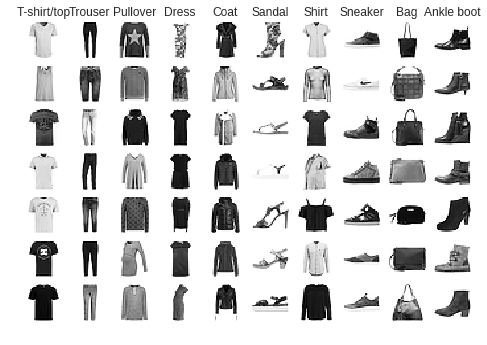

In [0]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
import matplotlib.pyplot as plt
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
# Do some preprocessing
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print('Shape of y_train:',y_train_onehot.shape)
print('Shape of y_test:', y_test_onehot.shape)

# reshape X_train and X_test
X_train = np.reshape(X_train, (X_train.shape[0],-1))
X_test = np.reshape(X_test, (X_test.shape[0],-1))

# check the shape
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)
Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)


In [0]:
# Build the model
# Build Softmax classification model
model_softmax = Sequential()
model_softmax.add(Dense(num_classes, input_shape = (X_train.shape[1],),activation='softmax'))

In [0]:
# Compile model
model_softmax.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_softmax.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
epochs = 5
# Fit the model
model_softmax.fit(X_train, y_train_onehot, validation_data=(X_test,y_test_onehot), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model_softmax.evaluate(X_test, y_test_onehot, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.3860 - acc: 0.8645 - val_loss: 0.4579 - val_acc: 0.8383
Epoch 2/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.3830 - acc: 0.8660 - val_loss: 0.4497 - val_acc: 0.8440
Epoch 3/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.3821 - acc: 0.8669 - val_loss: 0.4484 - val_acc: 0.8414
Epoch 4/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.3808 - acc: 0.8667 - val_loss: 0.4418 - val_acc: 0.8455
Epoch 5/5
10000/10000 [==============================] - 0s 46us/step
Accuracy: 84.21%


In [0]:
# Take out parameters W and b
params = {}
num = 0
for layer in model_softmax.layers:
  num += 1
  params[num] = layer.get_weights() 

W = params[1][0]
print('Shape of W', W.shape)
b = params[1][1]
print('Shape of b', b.shape)

Shape of W (784, 10)
Shape of b (10,)


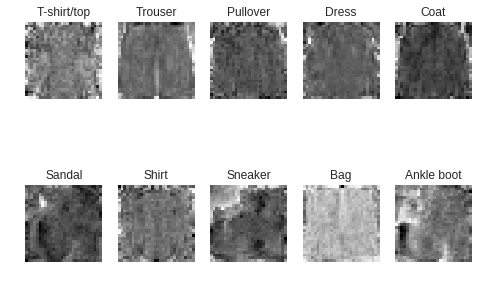

In [0]:
# Visualize weights
W = W.reshape(28,28,10)
W_min, W_max = np.min(W), np.max(W)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (W[:, :,  i].squeeze() - W_min) / (W_max - W_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

# Linear Model with SVM Loss

In [0]:
# Build Linear Model with SVM loss(hinge loss)
from keras import regularizers

model_svm = Sequential()
model_svm.add(Dense(num_class, input_shape = (X_train.shape[1],), ))

# complie model
model_svm.compile(loss='categorical_hinge', optimizer= 'adam', metrics=['accuracy'])
print(model_svm.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Fit the model
epoch = 5
model_svm.fit(X_train, y_train_onehot, validation_data=(X_test,y_test_onehot), epochs= epoch, batch_size=64)
# Final evaluation of the model
scores = model_svm.evaluate(X_test, y_test_onehot, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.4968 - acc: 0.7864 - val_loss: 0.4223 - val_acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3907 - acc: 0.8403 - val_loss: 0.3985 - val_acc: 0.8375
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3695 - acc: 0.8505 - val_loss: 0.3874 - val_acc: 0.8428
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3599 - acc: 0.8538 - val_loss: 0.3846 - val_acc: 0.8427
Epoch 5/5
10000/10000 [==============================] - 0s 48us/step
Accuracy: 84.32%
